In [1]:
import random

import numpy as np
import polars as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
from importlib import reload

import src.utils as ut
import src.processing as pr

In [2]:
reload(ut)
reload(pr)

pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

pl.Config.set_fmt_str_lengths(None)
pl.Config.set_tbl_width_chars(None)

colors = {'primary': 'black', 'secondary': '#00203FFF'}

In [3]:
# Run once

# !python -m spacy download en_core_web_sm
# !python -m spacy download en_core_web_lg

In [4]:
train_df = pr.tokenize_sof_df('data/train.csv.zip', process_polars=True)

Before processing:
Data Size: 49.0 MB
Number of Columns: 6
Number of Rows: 45000

After processing:
Data Size: 34.81 MB
Number of Columns: 5
Number of Rows: 45000


In [5]:
train_df.head(3)

id,title,body,tags,y
u32,list[str],list[str],list[str],cat
34552656,"[""java"", ""repeat"", … ""seconds""]","[""p"", ""familiar"", … ""apriciate""]","[""java"", ""repeat""]","""LQ_CLOSE"""
34553034,"[""java"", ""optionals"", ""immutable""]","[""p"", ""like"", … ""thread""]","[""java"", ""optional""]","""HQ"""
34553174,"[""text"", ""overlay"", … ""native""]","[""p"", ""attempt"", … ""leave""]","[""javascript"", ""image"", … ""opacity""]","""HQ"""


In [6]:
valid_df = pr.tokenize_sof_df('data/valid.csv.zip', process_polars=True)

Before processing:
Data Size: 16.37 MB
Number of Columns: 6
Number of Rows: 15000

After processing:
Data Size: 11.53 MB
Number of Columns: 5
Number of Rows: 15000


In [7]:
valid_df.head(3)

id,title,body,tags,y
u32,list[str],list[str],list[str],cat
34552974,"[""child"", ""record"", … ""server""]","[""have"", ""different"", … ""storedprocedure""]","[""sql"", ""sql-server""]","""LQ_EDIT"""
34554721,"[""retrieve"", ""datum"", ""table""]","[""table""]","[""php"", ""mysql"", … ""mysqli""]","""LQ_EDIT"""
34555135,"[""panda""]","[""p"", ""try"", … ""help""]","[""python"", ""pandas""]","""HQ"""


In [8]:
# Selecting a body of a random question to view it before preprocessing
n = len(train_df)

random.seed(3)
ind = random.sample(range(n), 1)[0]

print(f"id#{ind} \n")
print(f'Title before processing: \n', '-'*40, '\n', pd.read_csv('data/train.csv.zip').loc[ind, ['Title']], '\n'*1)
print(f'Title after processing: \n', '-'*40, '\n', train_df[ind, 'title'].to_numpy(), '\n'*2)
print(f'Body before processing: \n', '-'*40, '\n', pd.read_csv('data/train.csv.zip').loc[ind, ['Body']], '\n'*1)
print(f'Body after processing: \n', '-'*40, '\n', train_df[ind, 'body'].to_numpy())

id#15595 

Title before processing: 
 ---------------------------------------- 
 Title    What is the logic behind deviding arrays of of double precision matrix to a large number before sending that matrix to a solver?
Name: 15595, dtype: object 

Title after processing: 
 ---------------------------------------- 
 ['logic' 'devide' 'array' 'double' 'precision' 'matrix' 'large' 'number'
 'send' 'matrix' 'solver'] 


Body before processing: 
 ---------------------------------------- 
 Body    I am given a code which divides the members of [A] in [A]{X}=[B] to 10^4 when assembling matrix [A]. \r\nThen it also divides the results array to this number to calculate correct value.\r\nI cannot understand why this should be done? Does double precision has limitation on numbers of integer it can hold; so the maker of this code wanted to increase number of float digits? Or maybe he misunderstood the conception of double precision?
Name: 15595, dtype: object 

Body after processing: 
 -----------

In [9]:
train_counts = pr.get_counts(train_df)

shape: (9, 4)
┌────────────┬─────────────┬────────────┬────────────┐
│ describe   ┆ title_count ┆ body_count ┆ tags_count │
│ ---        ┆ ---         ┆ ---        ┆ ---        │
│ str        ┆ f64         ┆ f64        ┆ f64        │
╞════════════╪═════════════╪════════════╪════════════╡
│ count      ┆ 45000.0     ┆ 45000.0    ┆ 45000.0    │
│ null_count ┆ 0.0         ┆ 0.0        ┆ 0.0        │
│ mean       ┆ 5.169133    ┆ 49.174178  ┆ 2.653889   │
│ std        ┆ 2.062189    ┆ 59.491026  ┆ 1.204084   │
│ min        ┆ 0.0         ┆ 0.0        ┆ 1.0        │
│ 25%        ┆ 4.0         ┆ 20.0       ┆ 2.0        │
│ 50%        ┆ 5.0         ┆ 33.0       ┆ 3.0        │
│ 75%        ┆ 6.0         ┆ 58.0       ┆ 3.0        │
│ max        ┆ 21.0        ┆ 2154.0     ┆ 6.0        │
└────────────┴─────────────┴────────────┴────────────┘


In [10]:
valid_counts = pr.get_counts(valid_df)

shape: (9, 4)
┌────────────┬─────────────┬────────────┬────────────┐
│ describe   ┆ title_count ┆ body_count ┆ tags_count │
│ ---        ┆ ---         ┆ ---        ┆ ---        │
│ str        ┆ f64         ┆ f64        ┆ f64        │
╞════════════╪═════════════╪════════════╪════════════╡
│ count      ┆ 15000.0     ┆ 15000.0    ┆ 15000.0    │
│ null_count ┆ 0.0         ┆ 0.0        ┆ 0.0        │
│ mean       ┆ 5.140133    ┆ 48.7162    ┆ 2.697      │
│ std        ┆ 2.070165    ┆ 55.33309   ┆ 1.209389   │
│ min        ┆ 0.0         ┆ 0.0        ┆ 1.0        │
│ 25%        ┆ 4.0         ┆ 20.0       ┆ 2.0        │
│ 50%        ┆ 5.0         ┆ 33.0       ┆ 3.0        │
│ 75%        ┆ 6.0         ┆ 58.0       ┆ 4.0        │
│ max        ┆ 18.0        ┆ 1531.0     ┆ 5.0        │
└────────────┴─────────────┴────────────┴────────────┘


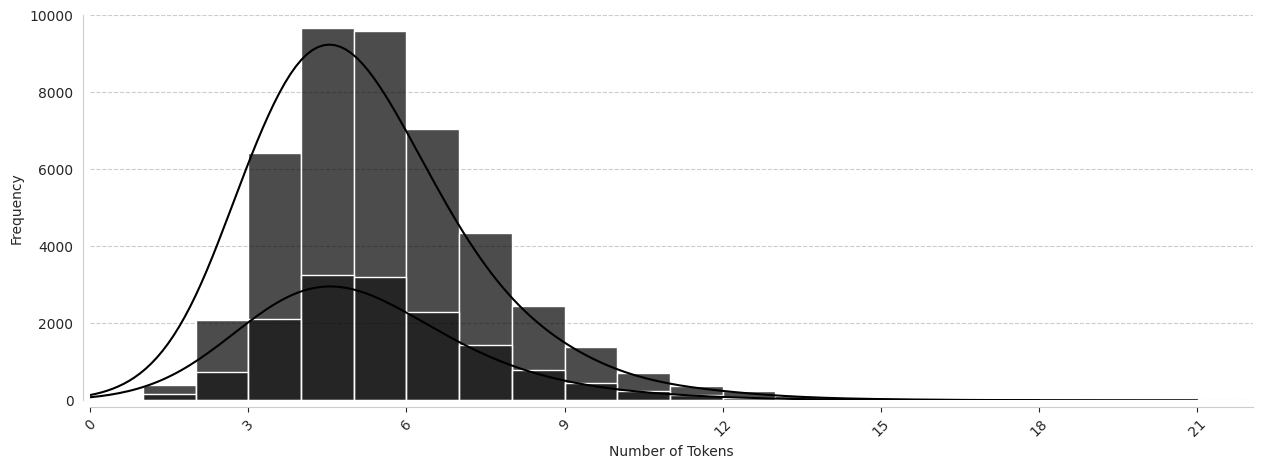

In [11]:
plt.rcParams["figure.figsize"] = (15,5)
sns.set_style('whitegrid')


max_xlim = train_counts['title_count'].max()
max_ylim = 10000
binsize = 1
x_spacing = 3
y_spacing = 2000
lbins = np.arange(0, max_xlim, binsize)

fig, ax = plt.subplots(figsize=(15,5))  
sns.histplot(
    ax=ax, 
    data=train_counts['title_count'], 
    color=colors['primary'], 
    kde=True, 
    kde_kws={'bw_adjust':3}, 
    alpha=0.7, 
    bins=lbins)

sns.histplot(
    ax=ax, 
    data=valid_counts['title_count'], 
    color=colors['primary'], 
    kde=True, 
    kde_kws={'bw_adjust':3}, 
    alpha=0.5, 
    bins=lbins)

ax.set_xlim(left=0)
ax.set_ylim(0, max_ylim)
ax.xaxis.set_major_locator(ticker.MultipleLocator(x_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(y_spacing))
ax.tick_params(axis='x', bottom=True, labelrotation = 45)
ax.set_xlabel('Number of Tokens')
ax.set_ylabel('Frequency')
ax.grid(visible=False, axis='x')
ax.grid(visible=True, which='major', axis='y', linestyle='--')
sns.despine(offset=5, trim=False)

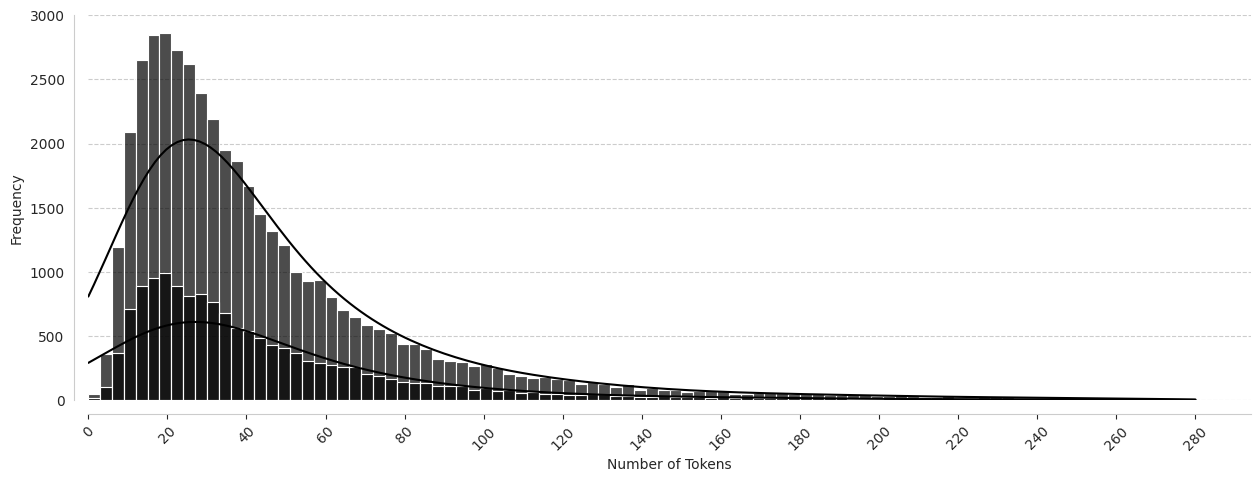

In [12]:
quantile = 0.99
max_xlim = train_counts['body_count'].filter(train_counts['body_count'] <= train_counts['body_count'].quantile(quantile)).max()
max_ylim = 3000
binsize = 3
x_spacing = 20
y_spacing = 500
lbins = np.arange(0, max_xlim, binsize)

fig, ax = plt.subplots(figsize=(15,5))  
sns.histplot(
    ax=ax, 
    data=train_counts['body_count'].filter(train_counts['body_count'] <= train_counts['body_count'].quantile(quantile)),
    color=colors['primary'], 
    kde=True, 
    kde_kws={'bw_adjust':3}, 
    alpha=0.7, 
    bins=lbins)

sns.histplot(
    ax=ax, 
    data=valid_counts['body_count'].filter(valid_counts['body_count'] <= train_counts['body_count'].quantile(quantile)), 
    color=colors['primary'], 
    kde=True, 
    kde_kws={'bw_adjust':3}, 
    alpha=0.7, 
    bins=lbins)

ax.set_xlim(left=0)
ax.set_ylim(0, max_ylim)
ax.xaxis.set_major_locator(ticker.MultipleLocator(x_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(y_spacing))
ax.tick_params(axis='x', bottom=True, labelrotation = 45)
ax.set_xlabel('Number of Tokens')
ax.set_ylabel('Frequency')
ax.grid(visible=False, axis='x')
ax.grid(visible=True, which='major', axis='y', linestyle='--')
sns.despine(offset=10, trim=False)